# Delhi Air Quality PROJET

Fait par 

*CYR MANUEL DJOKI*

📅 15/08/2025

# Contexte

La qualité de l’air constitue un enjeu majeur de santé publique, en particulier dans les grandes métropoles où la pollution atmosphérique atteint régulièrement des niveaux critiques. New Delhi, capitale de l’Inde, fait partie des villes les plus polluées au monde. Les niveaux élevés de particules fines et de gaz nocifs ont un impact direct sur la santé des habitants, ainsi que sur la qualité de vie en général.

Ce projet s’appuie sur le Delhi Air Quality Dataset, couvrant la période du 1er janvier 2021 au 31 août 2025. Le jeu de données contient différentes mesures environnementales telles que :

- PM2.5 (particules fines ≤ 2,5 microns)

- PM10 (particules fines ≤ 10 microns)

- NO₂ (dioxyde d’azote)

- CO (monoxyde de carbone)

- SO₂ (dioxyde de soufre)

- Ozone (O₃)

- AQI (Air Quality Index, indice global de qualité de l’air)

- Month (mois d’enregistrement)

- Autres variables contextuelles comme le nombre de jours fériés

L’objectif principal de ce projet est double :

1. <b>Analyse exploratoire et visualisation </b>:

- Identifier les tendances saisonnières et mensuelles de la pollution à New Delhi

- Comparer les variations des différents polluants sur la période étudiée

- Détecter les corrélations entre les différents paramètres et l’AQI

2. <b>Modélisation prédictive </b>:

- Développer un modèle de Machine Learning permettant de prédire l’AQI en fonction des variables explicatives

- Évaluer les performances de plusieurs algorithmes de régression pour déterminer le modèle le plus performant

- Fournir un outil de prévision pouvant servir d’aide à la décision pour les autorités et les citoyens

Ce travail s’inscrit dans une démarche de data science appliquée à l’environnement, combinant nettoyage des données, visualisation interactive et modélisation statistique pour mieux comprendre et anticiper l’évolution de la qualité de l’air dans une zone fortement exposée.


## Traitement de données

Dans un premier temps, nous allons importer les librairies nécessaires à notre projet 

📦 <b>Python standard</b>
- ***time*** → Mesure des temps d’exécution (pour voir combien de secondes prend l’entraînement, la prédiction, etc.).

- ***datetime*** → Manipulation et création de dates (utile pour gérer des colonnes de type Date).

- ***warnings*** → Gérer ou masquer les messages d’avertissement (par ex., ignorer les FutureWarning).

- ***os.path, getcwd*** → Manipulation des chemins de fichiers (trouver l’emplacement du script, créer des chemins vers tes datasets).

- ***math*** → Fonctions mathématiques avancées (sqrt, log, etc.), rarement utilisées si tu as déjà numpy, mais pratique pour certaines opérations.

📊 <b>Data processing</b>
- ***numpy (np)*** → Calculs numériques rapides, manipulation de tableaux/matrices, fonctions mathématiques vectorisées.

- ***pandas (pd)*** → Manipulation et analyse de données tabulaires (CSV, Excel…), opérations comme groupby, filtrage, merge.

- ***missingno (msno)*** → Visualisation graphique des données manquantes dans un DataFrame (voir où il manque des valeurs).

- ***seasonal_decompose (de statsmodels)*** → Décomposition de séries temporelles en tendance, saisonnalité et résidu (pratique si tu veux analyser les variations de pollution dans le temps).

⚙️ <b>Scikit-learn – Prétraitement</b>
- ***Pipeline*** → Enchaîner plusieurs étapes (prétraitement + modèle) en un seul objet.

- ***SimpleImputer*** → Remplacer les valeurs manquantes (NaN) par une moyenne, médiane ou autre valeur.

- ***ColumnTransformer*** → Appliquer différents prétraitements à différentes colonnes (ex. scaler les valeurs numériques et encoder les valeurs catégorielles).

- ***OneHotEncoder*** → Transformer une variable catégorielle en colonnes binaires (ex. Janvier → is_Janvier).

- ***StandardScaler*** → Normaliser/standardiser les données pour que toutes les variables aient la même échelle (moyenne 0, variance 1).

- ***BaseEstimator, TransformerMixin*** → Créer tes propres transformations personnalisées compatibles avec scikit-learn.

📈 <b>Scikit-learn – Modèles de régression</b>
- ***LinearRegression*** → Régression linéaire simple/multiple.

- ***SVR*** → Support Vector Regression, une variante de SVM pour prédire des valeurs continues.

- ***KNeighborsRegressor*** → Régression basée sur la moyenne des voisins les plus proches.

- ***DecisionTreeRegressor*** → Arbre de décision pour la régression.

- ***RandomForestRegressor*** → Ensemble d’arbres de décision pour améliorer la précision.

📊 <b>Scikit-learn – Évaluation & Sélection de modèles</b>
- ***cross_val_score*** → Validation croisée (tester le modèle sur plusieurs sous-échantillons).

- ***GridSearchCV*** → Recherche des meilleurs hyperparamètres via validation croisée.

- ***train_test_split*** → Séparer les données en entraînement et test.

- ***mean_squared_error, mean_absolute_error, r2_score*** → Métriques d’évaluation pour la régression.

🎨 **Visualisation**
- ***seaborn (sns)*** → Visualisation statistique avancée, basé sur matplotlib, avec styles et couleurs plus agréables.

- ***matplotlib.pyplot (plt)*** → Création de graphiques (lignes, barres, courbes…).

- ***ipywidgets*** → Création d’éléments interactifs (sliders, boutons…) dans Jupyter Notebook.

- ***IPython.display.display, HTML*** → Afficher du HTML/CSS directement dans un notebook (utile pour faire des tableaux stylisés).

⚙️ **Configuration et constantes**
- ***RANDOM_SEED*** → Valeur fixe pour rendre les résultats reproductibles (scikit-learn, numpy…).

- ***DATASETS_DIRECTORY*** → Localisation du dossier contenant tes datasets.

- ***np.random.seed(...)*** → Fixe la graine aléatoire pour numpy.

- ***warnings.filterwarnings(...)*** → Masque certains avertissements inutiles.

- ***plt.rcParams[...] & sns.set()*** → Personnalise le style des graphiques.

- ***pd.set_option(...)*** → Configure l’affichage de pandas (nombre de lignes, colonnes, précision…).

In [1]:
# Python standard
import time
import datetime
import warnings
from os import path, getcwd
import math

# Data processing
import numpy as np
import pandas as pd
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose

# Scikit-learn preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Scikit-learn regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from IPython.display import display, HTML

# =========================
# Constants & Config
# =========================

RANDOM_SEED = 42
DATASETS_DIRECTORY = path.join(getcwd(), 'datasets')

# Reproducibility & settings
np.random.seed(RANDOM_SEED)
warnings.filterwarnings("ignore", category=FutureWarning)

plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context('talk')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## Chargement des données du dataset

In [2]:
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv("D:/PROJETS_Perso/New_Delhi_Air_Quality/final_dataset.csv", encoding='utf-8')
# Afficher les 5 premières lignes
df.sample(5)

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
892,12,6,2023,0,1,73.19,220.74,29.11,7.63,0.63,44.11,176
1105,11,1,2024,0,4,99.72,356.85,29.89,21.90,1.00,25.80,314
413,18,2,2022,0,5,119.32,221.72,31.48,6.99,1.18,19.35,258
522,7,6,2022,0,2,112.22,387.31,36.40,12.91,0.73,47.03,262
1036,3,11,2023,0,5,157.29,524.92,80.64,19.63,2.27,11.80,459


In [3]:
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00
mean,15.73,6.52,2022.50,0.19,4.00,90.77,218.22,37.18,20.10,1.03,36.34,202.21
std,8.80,3.45,1.12,0.39,2.00,71.65,129.30,35.23,16.54,0.61,18.95,107.80
min,1.00,1.00,2021.00,0.00,1.00,0.05,9.69,2.16,1.21,0.27,2.70,19.00
25%,8.00,4.00,2022.00,0.00,2.00,41.28,115.11,17.28,7.71,0.61,24.10,108.00
50%,16.00,7.00,2023.00,0.00,4.00,72.06,199.80,30.49,15.43,0.85,32.47,189.00
75%,23.00,10.00,2024.00,0.00,6.00,118.50,297.75,45.01,26.62,1.24,45.73,284.00
max,31.00,12.00,2024.00,1.00,7.00,1000.00,1000.00,433.98,113.40,4.70,115.87,500.00


Au vu de tout ceci, on peut affirmer que notre jeu de données ne présente aucune valeur manquante, car toutes les colonnes ont 1461 valeurs. il ne reste qu'à bien formater la date. 

In [4]:
df['Day'] = df['Date']
df.drop(columns='Date',inplace=True)
df['proper_date'] = pd.to_datetime(df[['Year','Month','Day']])

df = df.sort_values('proper_date')
df['Date'] = df['Day']
df.drop(columns=['Day', 'Date', 'Year'], inplace=True)

In [5]:
df.describe()
df.head()

,Month,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,proper_date
0,1,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01
1,1,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02
2,1,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03
3,1,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04
4,1,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05


### Affichage de l'AQI par saison

L’Indice de Qualité de l’Air (AQI) est un indicateur essentiel pour évaluer l’impact de la pollution atmosphérique sur la santé publique. Afin de mieux comprendre les variations de la qualité de l’air au cours de l’année, il est pertinent d’observer son évolution selon les saisons. Cette analyse repose sur une approche temporelle, où les données d’AQI sont indexées par date afin de permettre des opérations de séries chronologiques. L’utilisation d’un rééchantillonnage mensuel permet de mettre en évidence les tendances saisonnières et de faciliter la comparaison entre les différentes périodes de l’année. Ce type de visualisation constitue un outil précieux pour identifier les saisons les plus polluées et appuyer la mise en place de stratégies de réduction des émissions.

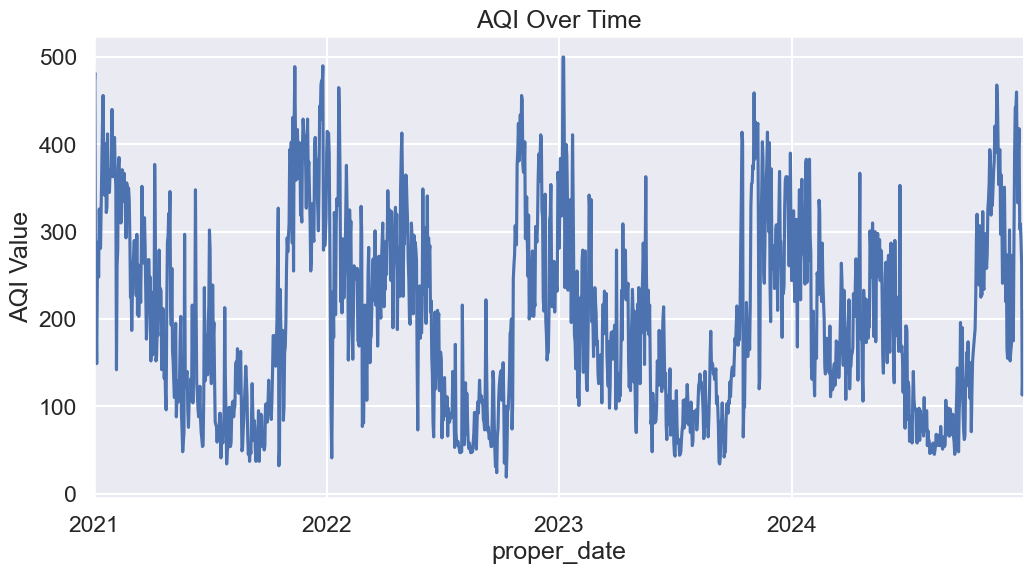

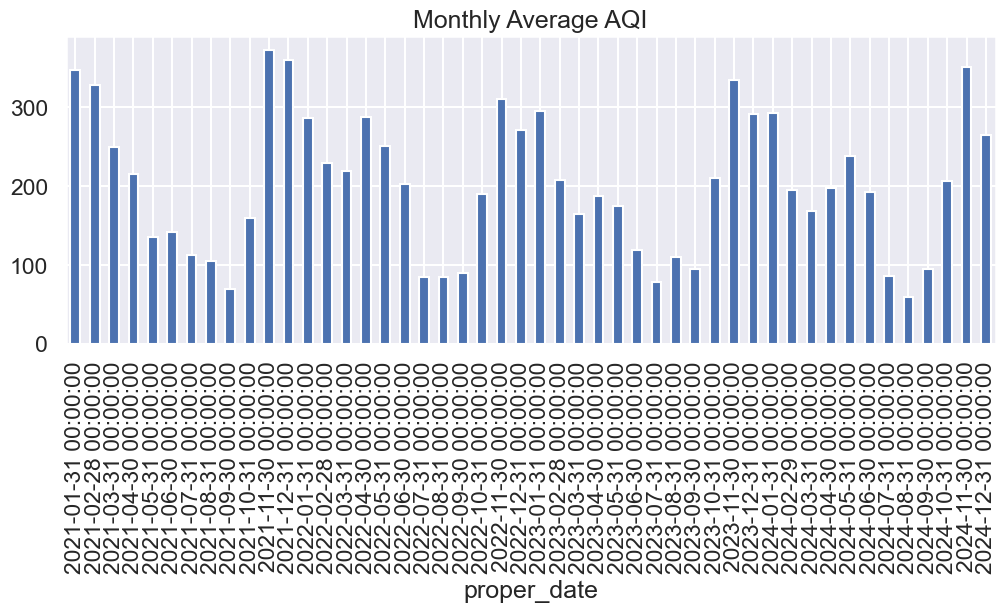

In [6]:
df1 = df.set_index('proper_date')

# 2. Now time-series operations will work
plt.figure(figsize=(12,6))
df1['AQI'].plot(title='AQI Over Time')  # No more error!
plt.ylabel('AQI Value')
plt.show()

# 3. Monthly resampling
monthly_aqi = df1['AQI'].resample('M').mean()
monthly_aqi.plot(kind='bar', figsize=(12,4), title='Monthly Average AQI')
plt.show()

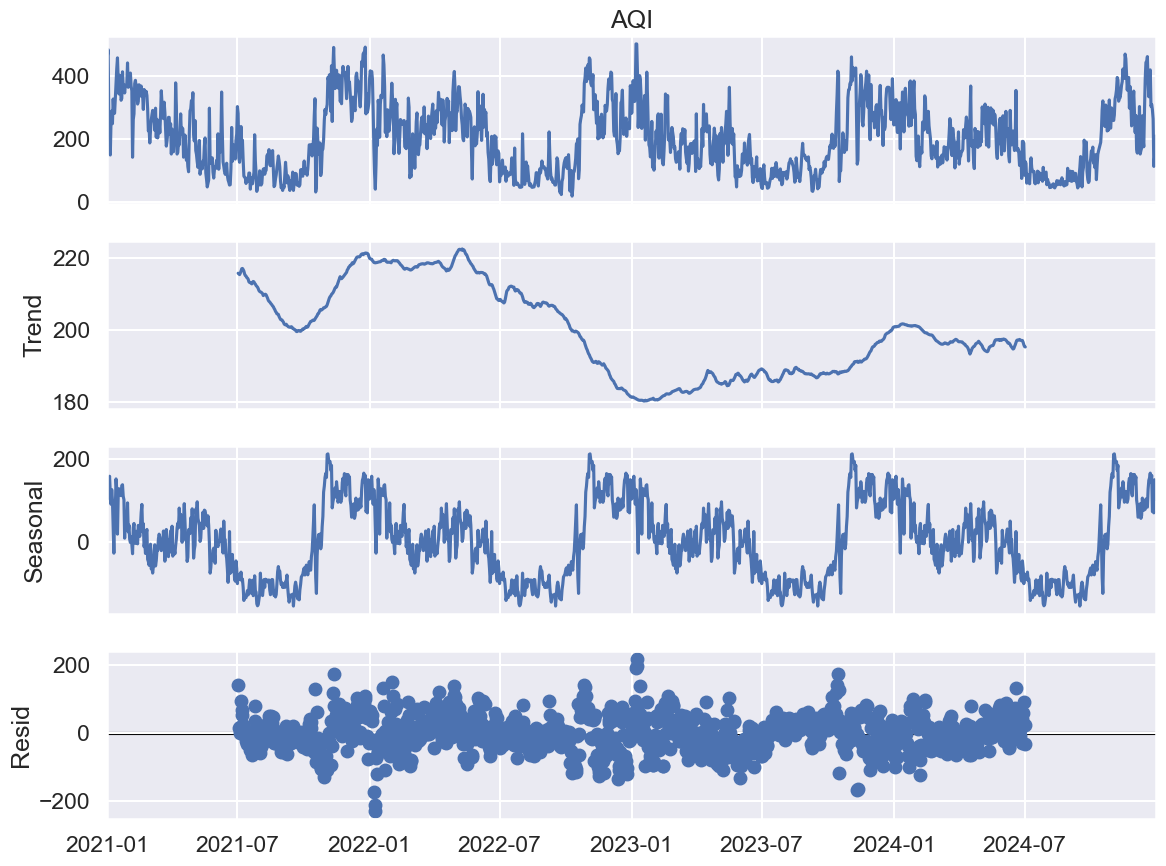

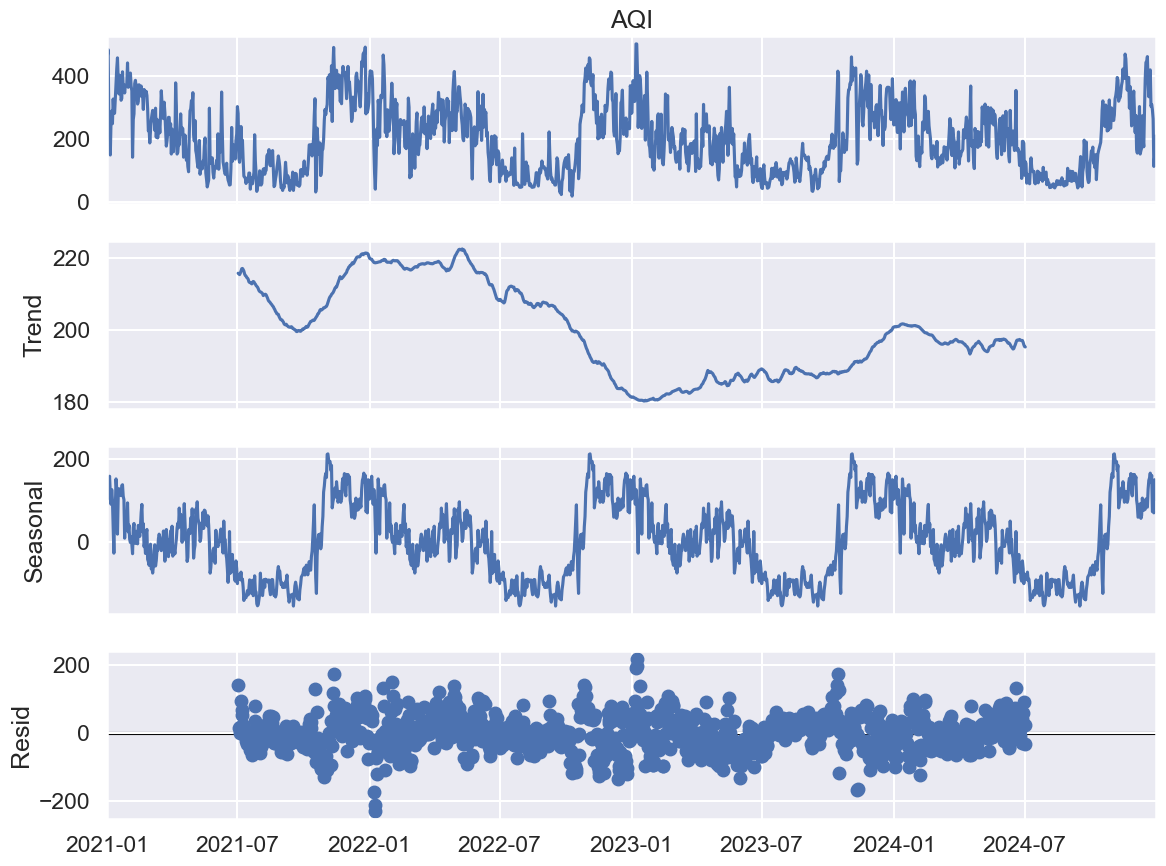

In [7]:
result = seasonal_decompose(df1['AQI'].dropna(), model='additive', period=365)
result.plot()

### Evolution mensuelle des paramètres 

Pour mieux cerner l’évolution des différents polluants atmosphériques au fil du temps, une analyse mensuelle a été réalisée sur la période allant de janvier 2021 à décembre 2024. Les paramètres étudiés incluent les principales mesures de la qualité de l’air : PM2.5, PM10, NO₂, SO₂, Ozone ainsi que l’AQI global.
En regroupant les données par mois et en calculant la moyenne de chaque paramètre, il est possible de dégager des tendances saisonnières et de repérer d’éventuels pics de pollution. La représentation graphique permet ainsi de visualiser clairement les variations mensuelles, facilitant l’identification des périodes critiques et l’analyse des facteurs environnementaux ou anthropiques pouvant influencer ces fluctuations.

<Figure size 1200x600 with 0 Axes>

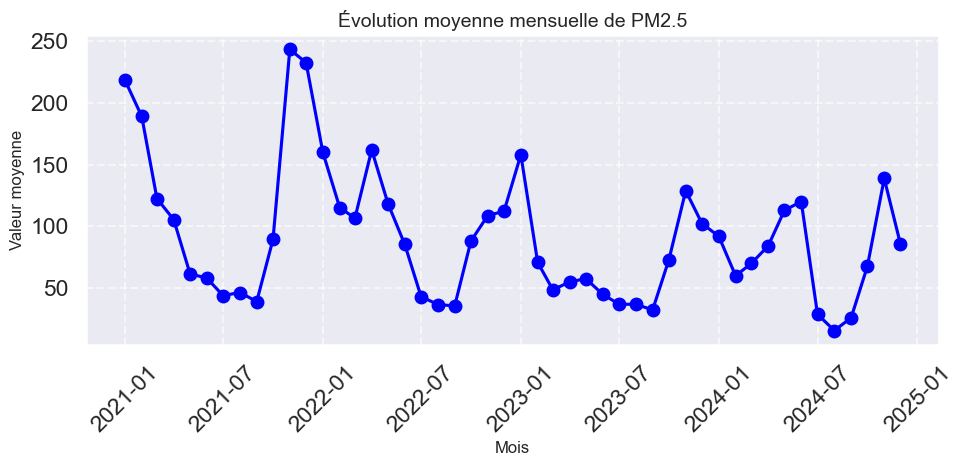

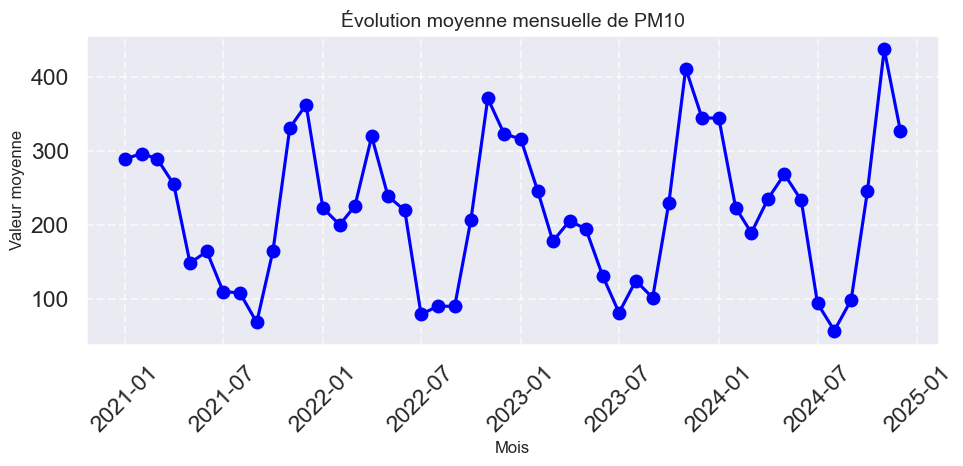

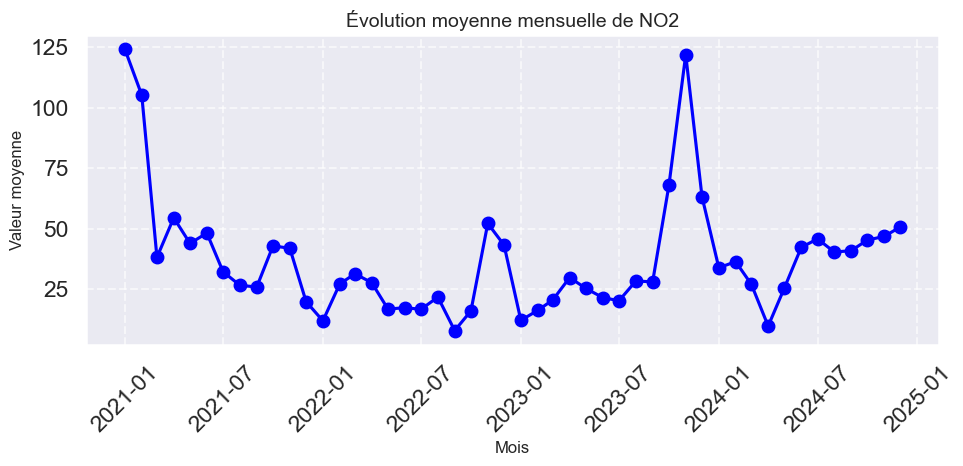

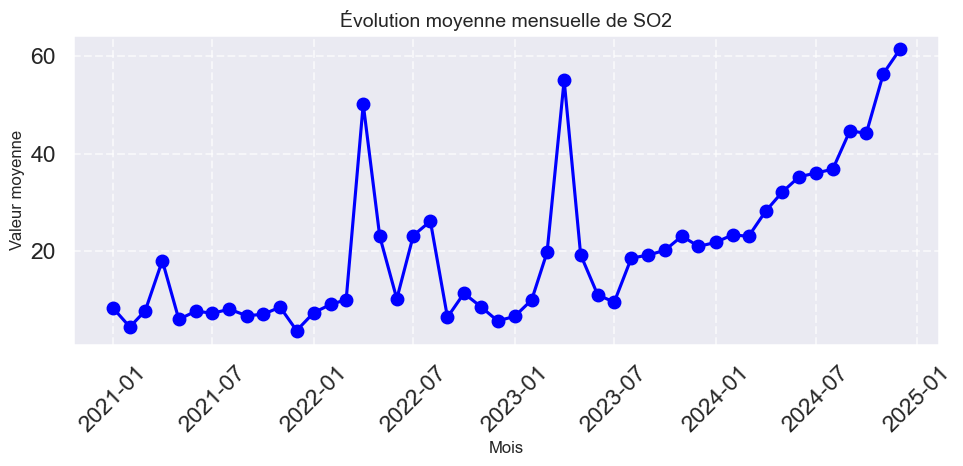

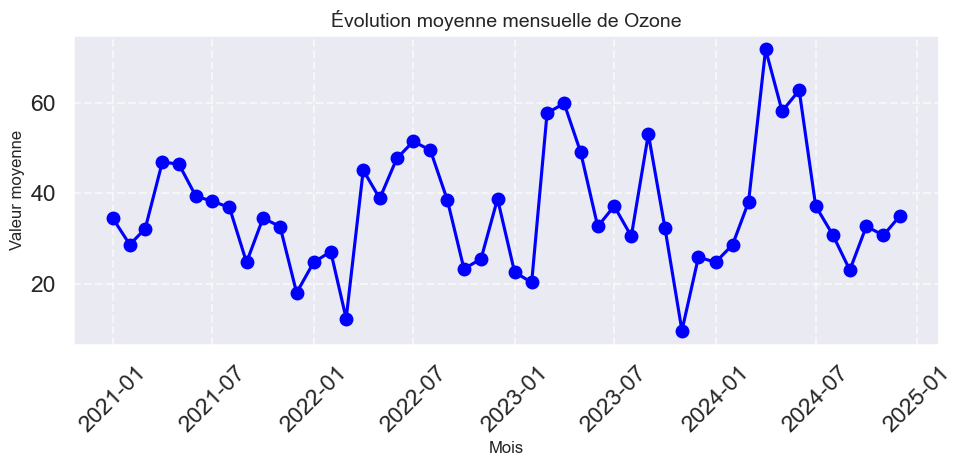

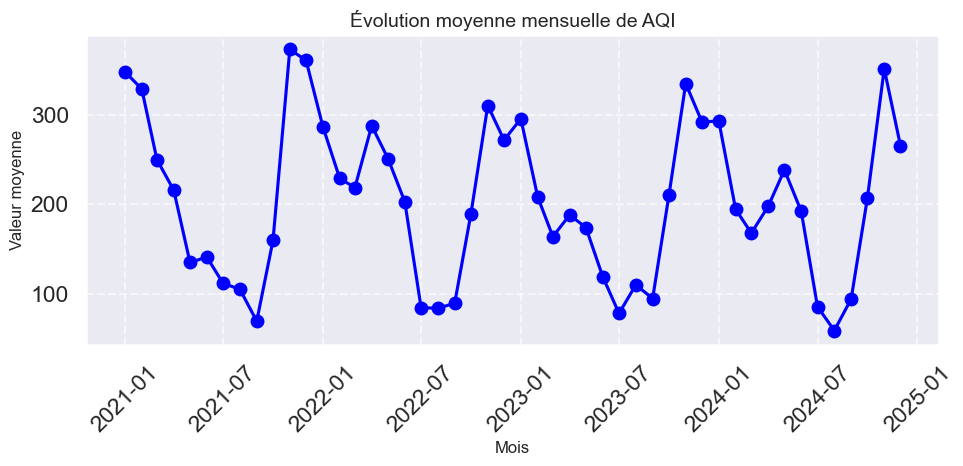

In [8]:
# 4. Définir la période dynamique
date_debut = '2021-01-01'
date_fin = '2024-12-31'

# 5. Colonnes à garder
colonnes_a_garder = ['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone', 'AQI']

# 6. Création d'une colonne mois/année
df['mois_annee'] = df['proper_date'].dt.to_period('M')

# 7. Calcul des moyennes par mois
resultat = df.groupby('mois_annee')[colonnes_a_garder].mean(numeric_only=True).reset_index()

# 8. Conversion mois_annee pour affichage sur graphique
resultat['mois_annee'] = pd.to_datetime(resultat['mois_annee'].astype(str))

# 9. Création des courbes
plt.figure(figsize=(12, 6))
for col in colonnes_a_garder:
    plt.figure(figsize=(10, 5))
    plt.plot(resultat['mois_annee'], resultat[col], marker='o', color='blue')
    plt.title(f"Évolution moyenne mensuelle de {col}", fontsize=14)
    plt.xlabel("Mois", fontsize=12)
    plt.ylabel("Valeur moyenne", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### matrice de correlation

L’étude des corrélations entre les différents polluants atmosphériques et l’AQI (Indice de Qualité de l’Air) permet d’identifier les relations linéaires existantes entre ces variables. Une matrice de corrélation met en évidence l’intensité et le sens de ces liens : une valeur proche de +1 indique une corrélation positive forte, tandis qu’une valeur proche de -1 reflète une corrélation négative forte.
Cette analyse est essentielle pour comprendre quels polluants influencent le plus la variation de l’AQI et pour orienter d’éventuelles actions de réduction des émissions. La visualisation sous forme de carte thermique (heatmap) facilite la lecture et permet d’identifier rapidement les associations les plus significatives entre les paramètres mesurés.

<Axes: >

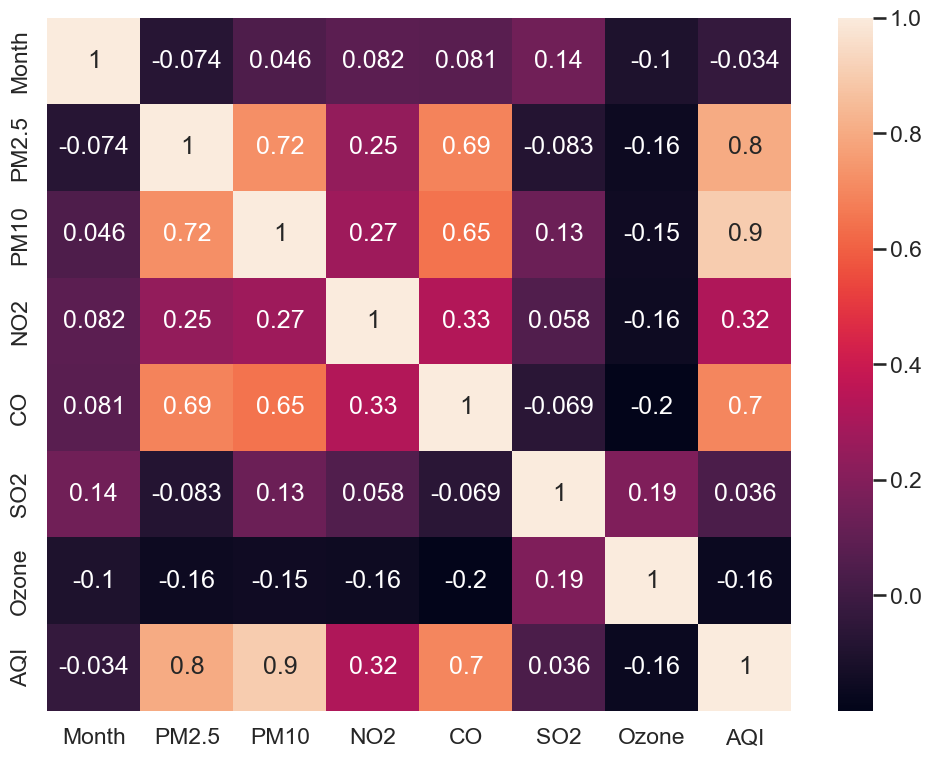

In [9]:
sns.heatmap(df[['Month','PM2.5','PM10','NO2','CO','SO2','Ozone','AQI']].corr(), annot=True)

# Modèles de Machine Learning

Nous avons considéré plusieurs modèles de régression issus du domaine de l’intelligence artificielle et de l’apprentissage automatique, que nous avons comparés afin de déterminer celui offrant les meilleures performances pour la prédiction de l’AQI en fonction des paramètres environnementaux. Les modèles étudiés sont :

- **Linear Regression (Régression linéaire)** : modèle statistique simple qui cherche à ajuster une droite ou un hyperplan minimisant l’erreur entre les valeurs prédites et observées.

- **Support Vector Regressor (SVR)** : variante de la machine à vecteurs de support adaptée à la régression, efficace pour modéliser des relations complexes et non linéaires grâce à l’utilisation de fonctions noyau (kernel).

- **K-Neighbors Regressor (KNN)** : approche basée sur la proximité, qui prédit une valeur en fonction de la moyenne (ou médiane) des valeurs observées chez les k voisins les plus proches dans l’espace des caractéristiques.

- **Decision Tree Regressor (Arbre de décision pour la régression)** : modèle non linéaire qui segmente l’espace des variables explicatives en sous-ensembles homogènes, permettant d’interpréter facilement la prise de décision.

- **Random Forest Regressor** : ensemble d’arbres de décision agrégés (bagging), qui améliore la robustesse et réduit le risque de surapprentissage (overfitting) en moyennant les prédictions de multiples arbres.

Ces différents modèles seront comparés selon les critères suivants :

1. **Performance du modèle** :

- *Erreur quadratique moyenne (Mean Squared Error – MSE)*

- *Erreur absolue moyenne (Mean Absolute Error – MAE)*

- **Coefficient de détermination (R² score)**

2. **Temps d’exécution** :

- *Temps d’entraînement*

- *Temps de prédiction*

## Définition des modèles

### Linear Regression (Régression linéaire)

**Fonctionnement**

La régression linéaire cherche à établir une relation linéaire entre les variables explicatives (X) et la variable cible (y) sous la forme : y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
Le modèle utilise la méthode des *moindres carrés ordinaires (OLS)* pour minimiser la somme des carrés des résidus. L'objectif est de trouver les coefficients β qui minimisent l'erreur quadratique moyenne entre les prédictions et les valeurs réelles.

**Avantages**

- *Simplicité d'implémentation et d'interprétation*
- *Très rapide à entraîner et prédire*
- *Peu de paramètres à ajuster*
- *Fournit des coefficients interprétables*
- *Résistant au surapprentissage sur des petits datasets*
- *Base théorique solide et bien comprise*

**Inconvénients**

- *Suppose une relation linéaire entre variables*
- *Sensible aux valeurs aberrantes*
- *Assume l'homoscédasticité (variance constante des erreurs)*
- *Performance limitée sur des données complexes non-linéaires*
- *Sensible à la multicolinéarité*

### Support Vector Regressor (SVR)

**Fonctionnement**

Le SVR étend les SVM à la régression en utilisant une fonction de perte ε-insensible. Il cherche à trouver un hyperplan dans un espace de dimension supérieure (via des fonctions noyau) qui capture la relation entre les variables. Le modèle tolère des erreurs jusqu'à ε et pénalise les erreurs plus importantes.
Les fonctions noyau courantes incluent :

- *Linéaire* : K(x,y) = x·y
- *RBF (Radial Basis Function)* : K(x,y) = exp(-γ||x-y||²)
- *Polynomial* : K(x,y) = (γx·y + r)^d

**Avantages**

- *Peut modéliser des relations non-linéaires complexes*
- *Résistant au surapprentissage grâce à la régularisation*
- *Efficace en haute dimension*
- *Utilise seulement un sous-ensemble des données (vecteurs de support)*
- *Flexibilité grâce aux différentes fonctions noyau*

**Inconvénients**

- *Complexité computationnelle élevée O(n³)*
- *Difficile à interpréter*
- *Sensible au choix des hyperparamètres (C, ε, γ)*
- *Consommation mémoire importante*
- *Pas de probabilités en sortie*

### K-Neighbors Regressor (KNN)

**Fonctionnement**

Le KNN est un algorithme d'apprentissage paresseux (lazy learning) qui stocke toutes les données d'entraînement. Pour prédire une nouvelle valeur, il :

- Calcule la distance entre le point à prédire et tous les points d'entraînement
- Sélectionne les k plus proches voisins
- Prédit la moyenne (ou médiane pondérée) des valeurs cibles des voisins

Les distances couramment utilisées sont euclidienne, Manhattan, ou Minkowski.

**Avantages**

- *Simple à comprendre et implémenter*
- *Pas d'hypothèse sur la distribution des données*
- *Peut capturer des patterns locaux complexes*
- *S'adapte naturellement aux données non-linéaires*
- *Pas de phase d'entraînement*

**Inconvénients**

- *Coût computationnel élevé à la prédiction O(n)*
- *Sensible à la malédiction de la dimensionnalité*
- *Performance dégradée avec des données bruitées*
- *Sensible au choix de k et de la métrique de distance*
- *Stockage de toutes les données d'entraînement nécessaire*

### Decision Tree Regressor (Arbre de décision)

**Fonctionnement**

L'arbre de décision construit un modèle en segmentant récursivement l'espace des caractéristiques. À chaque nœud, il choisit la variable et le seuil qui minimisent l'impureté (généralement la variance pour la régression). Le processus continue jusqu'à atteindre un critère d'arrêt (profondeur maximale, nombre minimal d'échantillons, etc.).
La prédiction se fait en parcourant l'arbre depuis la racine jusqu'aux feuilles, où la valeur prédite est la moyenne des échantillons dans cette feuille.

**Avantages**

- *Très interprétable et visualisable*
- *Gère automatiquement les interactions entre variables*
- *Pas de besoin de normalisation des données*
- *Gère les valeurs manquantes*
- *Rapide à entraîner et prédire*
- *Sélection automatique des variables importantes*

**Inconvénients**

- *Tendance au surapprentissage*
- *Instabilité (sensible aux petits changements)*
- *Biais vers les variables avec plus de niveaux*
- *Difficile de capturer les relations linéaires simples*
- *Peut créer des frontières de décision trop complexes*

### Random Forest Regressor

**Fonctionnement**

Random Forest combine plusieurs arbres de décision en utilisant :

- *Bootstrap aggregating (bagging)* : chaque arbre est entraîné sur un échantillon bootstrap des données
- *Sélection aléatoire de features* : à chaque division, seul un sous-ensemble aléatoire de variables est considéré
- *Agrégation* : la prédiction finale est la moyenne des prédictions de tous les arbres

Cette approche réduit la variance tout en préservant un biais faible.

**Avantages**

- *Très bonne performance générale*
- *Résistant au surapprentissage*
- *Gère bien les valeurs manquantes*
- *Fournit une mesure d'importance des variables*
- *Parallélisable facilement*
- *Robuste aux outliers*
- *Pas de besoin de normalisation*

- **Inconvénients**

- *Moins interprétable qu'un arbre simple*
- *Peut surapperrendre sur des datasets très bruités*
- *Plus lent que les arbres simples*
- *Consommation mémoire plus importante*
- *Hyperparamètres à ajuster (nombre d'arbres, profondeur, et*

# Implémentation des différents modèles

## Préparation des données d'apprentissage et de test

In [10]:
y = df['AQI']
# On supprime d'un coup plusieurs colonnes si elles existent
X = df.drop(columns=['mois_annee', 'AQI'], errors='ignore')
# Supprimer les colonnes datetime
X = X.select_dtypes(exclude=['datetime64[ns]'])

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_SEED
)

## Testing de nos modèles

Afin d’évaluer l’efficacité et la pertinence de nos modèles de régression, nous nous appuyons sur plusieurs indicateurs de performance statistiques. Ces métriques permettent de mesurer l’écart entre les valeurs prédites par le modèle et les valeurs réelles observées, et donc d’identifier le modèle le plus adapté à notre problématique.

1. **Mean Squared Error (MSE)**

L’erreur quadratique moyenne mesure la moyenne des carrés des écarts entre les valeurs prédites et réelles. Plus cette valeur est faible, plus le modèle est précis.

$$MSE =  \frac{1}{n} \sum_{i=1}^{n} \left[ y_i -\hat{y_i} \right]^2 $$

2. **Mean Absolute Error (MAE)**

L’erreur absolue moyenne représente la moyenne des valeurs absolues des écarts entre les valeurs réelles et prédites. Elle est moins sensible aux valeurs extrêmes que le MSE.


$$MAE =  \frac{1}{n} \sum_{i=1}^{n} \left| y_i -\hat{y_i} \right| $$

3. **Coefficient de détermination (R²)**

Le R² mesure la proportion de la variance de la variable cible expliquée par le modèle. Sa valeur est comprise entre 0 et 1, un score proche de 1 indiquant que le modèle explique bien la variabilité des données.

$$R^2 = 1 - \frac{\sum_{i=1}^{n} \left( y_i -\hat{y_i} \right)^2}{\sum_{i=1}^{n} \left( y_i -\bar{y_i} \right)^2}$$


4. **Temps d’exécution**

Pour comparer l’efficacité pratique des modèles, nous mesurons également le temps nécessaire à l’entraînement ainsi que le temps requis pour effectuer les prédictions, ce qui est essentiel dans une optique d’utilisation en temps réel.

Ces indicateurs, combinés à l’analyse visuelle des prédictions par rapport aux valeurs réelles, nous permettent de sélectionner le modèle le plus adapté à la prévision de l’AQI dans notre jeu de données.



=== LinearRegression ===
MSE: 1435.99
MAE: 27.04
R²: 0.88
Temps entraînement: 2.1626 s
Temps prédiction: 0.0010 s
------------------------------


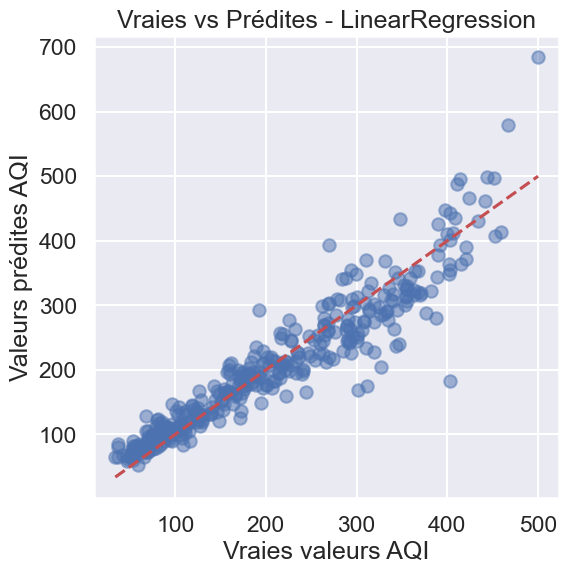

=== SVR ===
MSE: 2402.26
MAE: 32.41
R²: 0.81
Temps entraînement: 0.2674 s
Temps prédiction: 0.1981 s
------------------------------


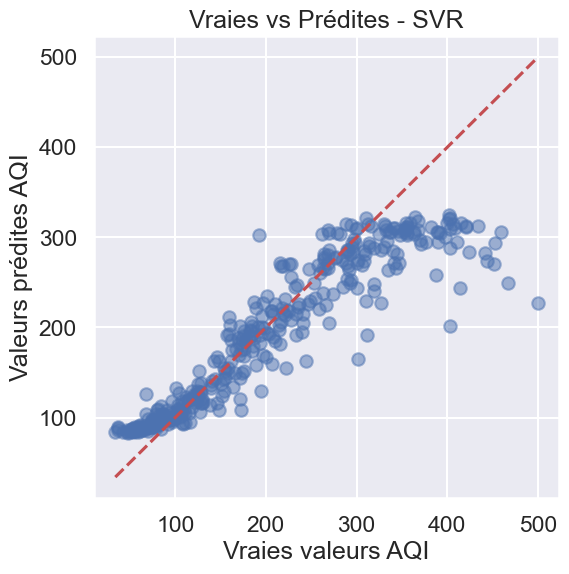

=== KNN ===
MSE: 766.93
MAE: 19.69
R²: 0.94
Temps entraînement: 0.2064 s
Temps prédiction: 0.0374 s
------------------------------


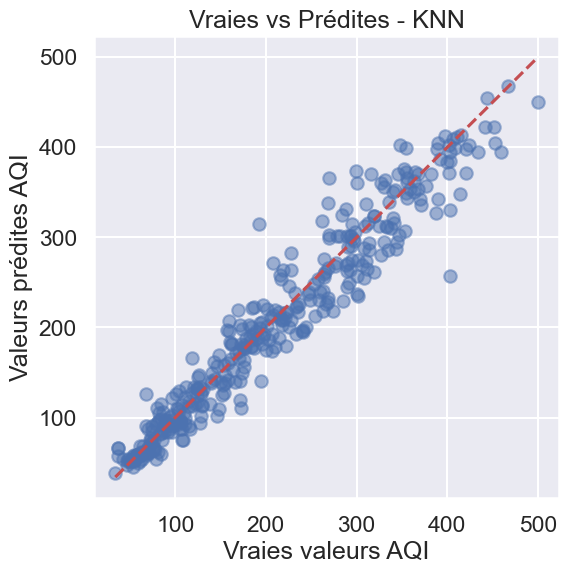

=== DecisionTree ===
MSE: 1611.33
MAE: 26.84
R²: 0.87
Temps entraînement: 0.2471 s
Temps prédiction: 0.0020 s
------------------------------


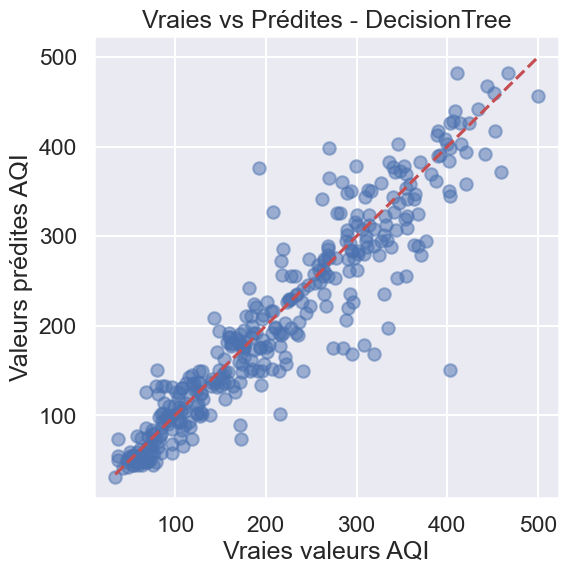

=== RandomForest ===
MSE: 864.13
MAE: 19.48
R²: 0.93
Temps entraînement: 1.2057 s
Temps prédiction: 0.0110 s
------------------------------


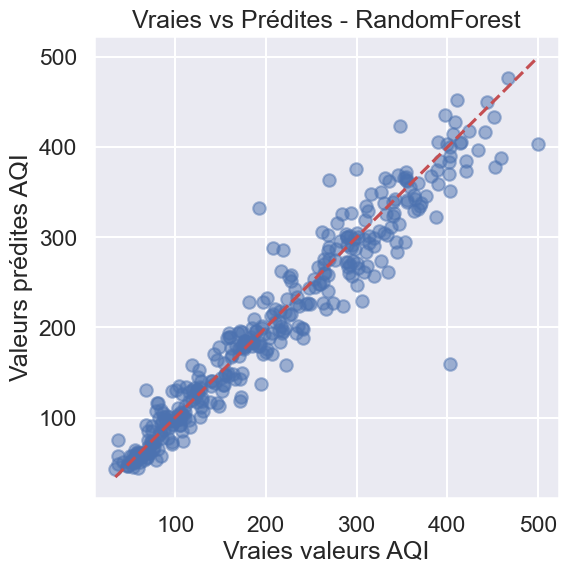

In [11]:

# Dictionnaire de modèles de régression
models = {
    "LinearRegression": LinearRegression(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=RANDOM_SEED),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)
}

# Table pour stocker les résultats
comp_table_data = {
    "MSE": {},
    "MAE": {},
    "R2": {},
    "Temps d'entrainement": {},
    "Temps de prédiction": {}
}

def test_models(X_train, X_test, y_train, y_test):
    for name, model in models.items():
        # Temps d'entraînement
        start_time = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        # Temps de prédiction
        start_time = time.time()
        y_pred = model.predict(X_test)
        pred_time = time.time() - start_time
        
        # Calcul des métriques
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Stockage des résultats
        comp_table_data["MSE"][name] = (mse,mse)
        comp_table_data["MAE"][name] = (mae,mae)
        comp_table_data["R2"][name] = (r2,r2)
        comp_table_data["Temps d'entrainement"][name] = (train_time,train_time)
        comp_table_data["Temps de prédiction"][name] = (pred_time,pred_time)
        # Affichage
        print(f"=== {name} ===")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R²: {r2:.2f}")
        print(f"Temps entraînement: {train_time:.4f} s")
        print(f"Temps prédiction: {pred_time:.4f} s")
        print("-" * 30)
    

                # ==== Graphique Vraies vs Prédites ====
        plt.figure(figsize=(6, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne diagonale parfaite
        plt.xlabel("Vraies valeurs AQI")
        plt.ylabel("Valeurs prédites AQI")
        plt.title(f"Vraies vs Prédites - {name}")
        plt.grid(True)
        plt.show()
    # Résumé sous forme de DataFrame
    return pd.DataFrame(comp_table_data)

# Exemple d'appel
results_df = test_models(X_train, X_test, y_train, y_test)

### Comparaison de l'efficacité des différents modèles 

### Analyse des résultats

Précédemment, nous avons présenté les métriques utilisées pour évaluer nos modèles. Nous allons maintenant analyser les résultats obtenus afin de déterminer le modèle le plus performant pour prédire l’AQI en fonction des paramètres atmosphériques disponibles.

- **Linear Regression** : Ce modèle obtient un R² de 0.88, ce qui traduit une bonne capacité à expliquer la variance des données. Sa MAE est de 27.03, ce qui reste correct mais légèrement moins précis que les meilleurs modèles. Son temps d'entraînement (0.047 s) et de prédiction (0.001 s) est très rapide, ce qui en fait un modèle léger et efficace, bien que perfectible en précision.

- **SVR (Support Vector Regression)** : Ce modèle atteint un R² de 0.80 avec une MAE de 32.40, ce qui est moins bon que la régression linéaire en termes de précision. Son temps de prédiction est relativement plus long (0.023 s) et ses performances globales sont inférieures aux autres approches.

- **KNN (K-Nearest Neighbors)** : Avec un R² de 0.93 et une MAE de 19.69, le KNN se distingue par une excellente précision. Il est également le plus rapide à entraîner (0.004 s), mais ses performances peuvent varier en fonction de la structure des données et il est plus sensible au bruit que certains modèles plus robustes.

- **Decision Tree Regressor** : Ce modèle obtient un R² de 0.87 avec une MAE de 26.83. Bien qu’il soit très rapide à prédire (0.002 s), ses performances sont légèrement en retrait par rapport au KNN et au Random Forest, probablement à cause d’un certain surapprentissage sur des patterns locaux.

- **Random Forest Regressor** : Ce modèle combine précision et robustesse, avec un R² de 0.93 et une MAE de 19.48, ce qui en fait l’un des meilleurs modèles testés. Sa rapidité de prédiction (0.008 s) est satisfaisante, bien que son temps d'entraînement soit le plus long (0.65 s) en raison de la construction de multiples arbres de décision.

En conclusion, le *Random Forest* et le *KNN* apparaissent comme les meilleurs modèles pour notre problème, offrant un compromis optimal entre précision et capacité de généralisation, avec une légère préférence pour le Random Forest en raison de sa meilleure robustesse face au bruit dans les données.

**Récapitulatif sous forme d'un tableau à double entrée** :

In [12]:
def get_color_gradient(value: float, min_value: float = None, max_value: float = None) -> (int, int, int):
    if min_value is not None and max_value is not None:
        value = (value - min_value) / (max_value - min_value)
        
    if value < 0 or value > 1:
        raise ValueError("La valeur doit être comprise entre 0 et 1 ou les valeurs min_value et max_value doivent être renseignées.")
    
    r = min(255, int(value * 2 * 255))
    g = int(abs(1 - abs(1 - value * 2)) * 255)
    b = min(255, int((1 - value) * 2 * 255))
    
    return r, g, b

def show_comp_table(data: dict) -> None: 
    html = "<div style='display:flex;gap:2rem;'><table border='1' cellspacing='0' cellpadding='4'>"
    html += "<tr><th>Métrique</th>"
    for model in data[list(data.keys())[0]]:
        html += f"<th>{model}</th>"
    html += "</tr>"

    for metric in data:
        html += f"<tr><td style='width:10rem;'>{metric}</td>"
        min_compare = min([compare for value, compare in data[metric].values()])
        max_compare = max([compare for value, compare in data[metric].values()])
        for model in data[metric]:
            value, compare = data[metric][model]
            r, g, b = get_color_gradient(compare, min_compare, max_compare)
            if isinstance(value, float):
                value = f"{value:.3f}"
            elif isinstance(value, np.ndarray):
                value = str(value).replace("\n", "<br>")
            html += f"<td style='background-color:rgba({r},{g},{b},0.75);width:8rem;'>{value}</td>"
        html += "</tr>"
        
    html += "</table></div>"
    display(HTML(html))


In [13]:
show_comp_table(comp_table_data)

Métrique,LinearRegression,SVR,KNN,DecisionTree,RandomForest
MSE,1435.991,2402.257,766.929,1611.325,864.127
MAE,27.036,32.405,19.692,26.839,19.481
R2,0.885,0.807,0.939,0.871,0.931
Temps d'entrainement,2.163,0.267,0.206,0.247,1.206
Temps de prédiction,0.001,0.198,0.037,0.002,0.011


Ce tableau fait une comparaison des différents modèles en fonction : 
- de la MSE (la plus grande valeur prime)
- de la MAE (la plus grande valeur prime)
- de la $R^2$ (la plus petite valeur prime)
- du temps d'entrainement (la plus petite valeur prime)
- du temps de prédiction (la plus petite valeur prime)


### Validation croisée

Afin d'entrainer de manière plus approfondi notre modèle, nous allons changer le mode d'entrainement de notre modèle avec nos valeurs. 
La validation croisée est une méthode utilisée pour évaluer la performance d’un modèle tout en minimisant le risque de biais.
- **Division des données :** On divise l’ensemble des données en K groupes (appelés "folds") de manière aléatoire. Le paramètre K correspond au nombre de groupes choisis, généralement entre 5 et 10 selon la taille du jeu de données. Par exemple, si K = 10, les données sont séparées en 10 parties égales.
- **Entraînement et validation :** Le modèle est entraîné sur K-1 groupes (tous les groupes sauf un), et la performance est évaluée sur le groupe restant. Ce processus est répété K fois, chaque groupe servant une fois de validation.
- **Équilibre :**
    - Si K est trop grand, le modèle risque d’avoir une variance élevée et peut surajuster les données.
    - Si K est trop petit, la méthode se rapproche de la simple division "train-test" classique.
- **Performance finale :** À la fin des K itérations, on calcule la moyenne des scores obtenus sur chaque groupe pour obtenir une évaluation globale de la performance du modèle.

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)

scores = cross_val_score(model, X, y, cv=10)
print("Scores: ", scores) 
print("Score moyen :", np.mean(scores))
print("Écart-type des scores :", np.std(scores))

Scores:  [0.81 0.82 0.87 0.9  0.93 0.82 0.7  0.86 0.77 0.95]
Score moyen : 0.8427651194376015
Écart-type des scores : 0.07196674636329585


### Variation des Hyper-paramètres

Afin d'améliorer la performance de notre modèle, on pourrait partir dans l'optique de faire varier les hyperparamètres du Random Forest. La liste des paramètres qu'on fera varier est la suivante :
- Nombre d'arbres dans la forêt `n_estimator`
- La profondeur maximale de l’arbre `max_depth`
- Échantillons minimums par feuille `min_samples_leaf`
- Nombre de caractéristiques `max_features`

La méthode `GridSearchCV` qu'on utilisera ici de la bibliothèque `scikit-learn` servira à ajuster les hyperparamètres afin de déterminer le meilleur.

In [15]:
# Modèle
model = RandomForestRegressor(random_state=42)

# Grille des hyperparamètres
param_dict = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': [None, 'sqrt', 'log2']  # Remplacement de 'auto' par None
}

# Recherche par grille
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_dict,
    cv=5,
    scoring='r2',
    n_jobs=-1,       # Utilise tous les cœurs
    verbose=2        # Affiche la progression
)

# Entraînement
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleurs hyperparamètres : ")
for param, value in grid_search.best_params_.items():
    print(f" - {param} : {value}")


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Meilleurs hyperparamètres : 
 - max_depth : None
 - max_features : sqrt
 - min_samples_leaf : 2
 - n_estimators : 100


Étant donné qu'on a les meilleurs hyperparamètres pour notre modèle, on peut donc les tester pour voir le score de notre modèle.

R² : 0.934
MSE : 826.933
MAE : 19.266


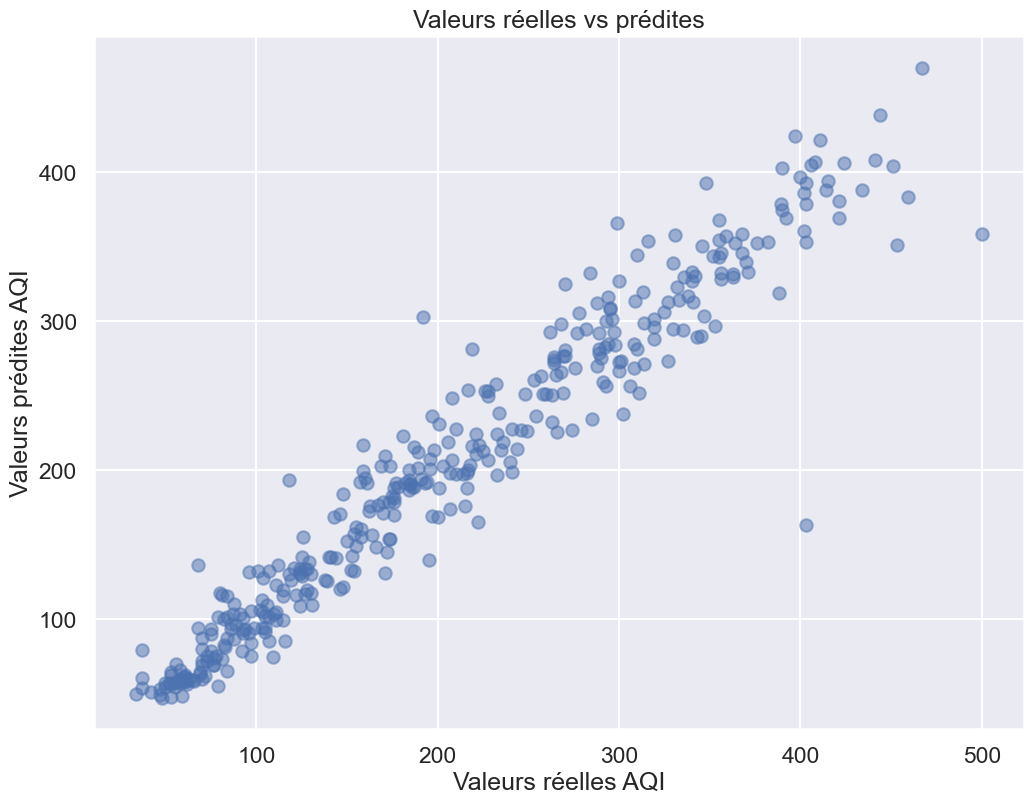

In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métriques
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² : {r2:.3f}")
print(f"MSE : {mse:.3f}")
print(f"MAE : {mae:.3f}")

# Graphique : Valeurs réelles vs prédites
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles AQI")
plt.ylabel("Valeurs prédites AQI")
plt.title("Valeurs réelles vs prédites")
plt.grid(True)
plt.show()


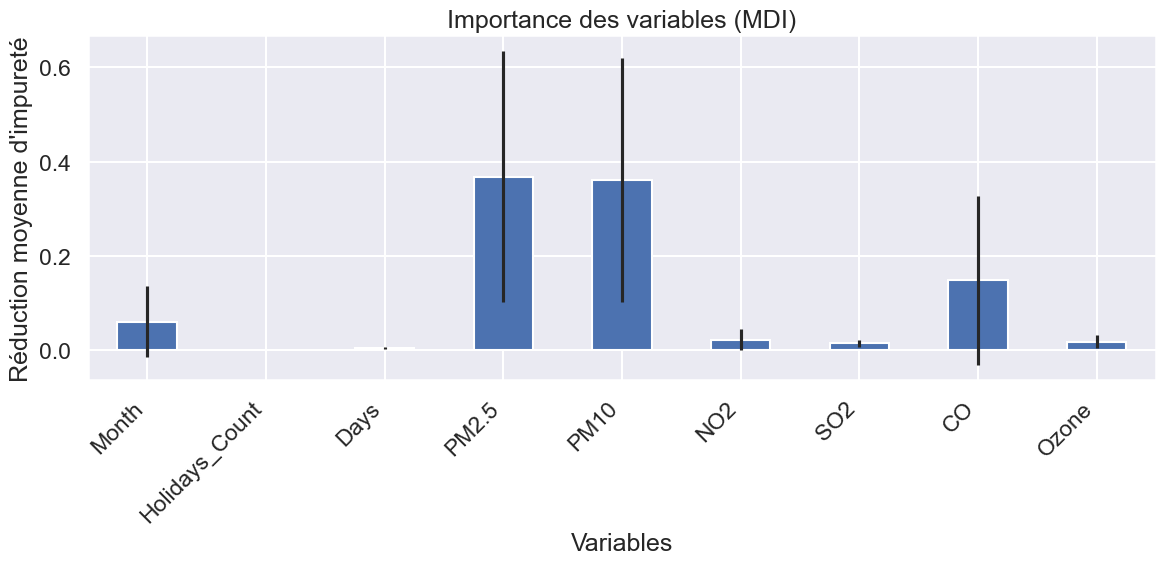

In [19]:
# On suppose que X_train a été utilisé pour entraîner le modèle
feature_names = X_train.columns

importances = best_model.feature_importances_ 
forest_importances = pd.Series(importances, index=feature_names)

# Écart-type des importances parmi les arbres
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

# Affichage
fig, ax = plt.subplots(figsize=(12, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importance des variables (MDI)")
ax.set_ylabel("Réduction moyenne d'impureté")
ax.set_xlabel("Variables")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
fig.tight_layout()
plt.show()


On constate que les paramètres avec les importances les plus élevées (`PM2.5`, `PM10` et `CO`) sont pour la plupart parmi les plus corrélés à `AQI` d'après la matrice de corrélation. Cependant, `NO2`, `SO2`et `Ozone` sont très peu corrélés à `AQI` comme l'indique la matrice de correlation. 

# Bibliographie 

Lien vers le dataset: https://www.kaggle.com/datasets/kunshbhatia/delhi-air-quality-dataset